# Modelos de regresión

**Autor/es:**
+ Integrante 1
+ Integrante 2

**Correos Electrónicos:**
+ Correo integrante 1
+ Correo integrante 2

**Fecha de Creación:** Septiembre de 2024  
**Versión:** 1.0

---

## Descripción

Este notebook contiene el desarrollo de la evaluación 2 - parte 1 de la asignatura de Inteligencia Artificial de la carrera de Ingeniería civil en informática de la Universidad del Bío Bío - Sede Concepción


In [ ]:
# Descargar el archivo a la carpeta data
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/walmart.csv.zip

# Descomprimir el archivo directamente dentro de la carpeta data
!unzip -q walmart.csv.zip

# Eliminar el archivo zip
!rm walmart.csv.zip

# Eliminar la carpeta __MACOSX si se creó
!rm -rf __MACOSX

--2024-09-28 13:06:03--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/walmart.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4493735 (4.3M) [application/zip]
Saving to: ‘walmart.csv.zip’

walmart.csv.zip     100%[===================>]   4.29M  --.-KB/s    in 0.09s   

2024-09-28 13:06:03 (49.8 MB/s) - ‘walmart.csv.zip’ saved [4493735/4493735]



# Descripción de la data

El conjunto de datos proporciona información sobre:
+ Store: número de identificación de la tienda.
+ Date: semana en la que ocurrieron las ventas.
+ Weekly_Sales: monto total de ventas en esa tienda durante la semana.
+ Holiday_Flag: Un indicador binario que muestra si la semana coincide con un feriado importante.
+ Temperature: temperatura registrada en el día de la venta.
+ Fuel_Price: El precio del combustible en la región.
+ CPI: índice de precios al consumidor en la región.
+ Unemployment: tasa de desempleo prevalente en ese momento.
+ Event_Type: tipo de evento asociado a la semana, como Super Bowl, Labour Day, Thanksgiving, Christmas o semana normal.



# Contexto del negocio

Una cadena de tiendas minoristas desea mejorar la precisión en la planificación de inventarios y recursos mediante la redicción del monto de las ventas semanales en cada una de sus sucursales. Para lograr esto, se cuenta con un set de datos que incluye múltiples variables relevantes, como las ventas semanales históricas, las condiciones económicas y eventos especiales que podrían impactar el comportamiento de los consumidores.

# Objetivo

Desarrollar modelos de regresión que permitan predecir el monto de las ventas semanales para cada tienda, basándose en variables que reflejan tanto factores económicos como eventos estacionales y externos. Esta predicción permitirá a la cadena anticiparse a fluctuaciones en la demanda, optimizando así su cadena de suministro y maximizando la eficiencia operativa.

# Preparación del entorno

In [5]:
# Escriba su código acá
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_log_error

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# Carga de la data

In [44]:
# Escriba su código acá

data = pd.read_csv("walmart.csv")

# Fase 1 - Comprensión del negocio

Una cadena de tiendas minoristas desea mejorar la precisión en la planificación de inventarios y recursos mediante la redicción del monto de las ventas semanales en cada una de sus sucursales. Para lograr esto, se cuenta con un set de datos que incluye múltiples variables relevantes, como las ventas semanales históricas, las condiciones económicas y eventos especiales que podrían impactar el comportamiento de los consumidores.

# Fase 2 - Comprensión de los datos

In [10]:
# Escriba su código acá
data.shape

(421570, 18)

In [11]:
data.columns

Index(['Unnamed: 0', 'Store', 'Date', 'IsHoliday', 'Dept', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size',
       'Event_Type'],
      dtype='object')

In [12]:
data.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Event_Type
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,Normal
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,Normal
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,Normal
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,Normal
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,Normal


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    421570 non-null  int64  
 1   Store         421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   IsHoliday     421570 non-null  int64  
 4   Dept          421570 non-null  float64
 5   Weekly_Sales  421570 non-null  float64
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   MarkDown1     421570 non-null  float64
 9   MarkDown2     421570 non-null  float64
 10  MarkDown3     421570 non-null  float64
 11  MarkDown4     421570 non-null  float64
 12  MarkDown5     421570 non-null  float64
 13  CPI           421570 non-null  float64
 14  Unemployment  421570 non-null  float64
 15  Type          421570 non-null  int64  
 16  Size          421570 non-null  int64  
 17  Event_Type    421570 non-null  object 
dtypes: f

In [14]:
data.isna().sum()

Unnamed: 0      0
Store           0
Date            0
IsHoliday       0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Event_Type      0
dtype: int64

In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,421570.0,211611.321278,122195.149363,0.000,105782.250000,211603.50000,317424.750000,423285.000000
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
IsHoliday,421570.0,0.070358,0.255750,0.000,0.000000,0.00000,0.000000,1.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,421570.0,2590.074819,6052.385934,0.000,0.000000,0.00000,2809.050000,88646.760000
MarkDown2,421570.0,879.974298,5084.538801,-265.760,0.000000,0.00000,2.200000,104519.540000
MarkDown3,421570.0,468.087665,5528.873453,-29.100,0.000000,0.00000,4.540000,141630.610000


In [46]:
df_final = data.drop(['Unnamed: 0'],axis=1)

In [47]:
df_final.columns

Index(['Store', 'Date', 'IsHoliday', 'Dept', 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Event_Type'],
      dtype='object')

In [48]:
#obtiene la correlacion de las variables con la variable objetivo (Weekly_Sales)
corr_matrix = df_final[df_final.describe().columns].corr()
corr_matrix["Weekly_Sales"].sort_values(ascending=False)

Weekly_Sales    1.000000
Size            0.243828
Type            0.182242
Dept            0.148032
MarkDown5       0.050465
MarkDown1       0.047172
MarkDown3       0.038562
MarkDown4       0.037467
MarkDown2       0.020716
IsHoliday       0.012774
Fuel_Price     -0.000120
Temperature    -0.002312
CPI            -0.020921
Unemployment   -0.025864
Store          -0.085195
Name: Weekly_Sales, dtype: float64

In [49]:
# Escriba su código acá
df_final.query ("Weekly_Sales < 0 or Unemployment < 0 or Fuel_Price < 0 or CPI < 0 ")

,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Event_Type
182,1,2010-02-19,0,47.0,-863.00,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,3,151315,Normal
429,1,2010-03-12,0,47.0,-698.00,57.79,2.667,0.00,0.00,0.00,0.00,0.00,211.380643,8.106,3,151315,Normal
2555,1,2010-10-08,0,47.0,-58.00,63.93,2.633,0.00,0.00,0.00,0.00,0.00,211.746754,7.838,3,151315,Normal
3632,1,2011-01-21,0,54.0,-50.00,44.04,3.016,0.00,0.00,0.00,0.00,0.00,211.827234,7.742,3,151315,Normal
4382,1,2011-04-08,0,47.0,-298.00,67.84,3.622,0.00,0.00,0.00,0.00,0.00,215.074394,7.682,3,151315,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419972,45,2012-05-18,0,49.0,-3.97,66.30,3.848,6813.74,0.00,13.86,936.49,2941.55,190.996448,8.567,2,118221,Normal
420031,45,2012-05-25,0,49.0,-4.97,67.21,3.798,5370.39,0.00,361.22,1287.62,2461.81,191.002810,8.567,2,118221,Normal
420370,45,2012-06-29,0,49.0,-34.00,75.22,3.506,3291.36,425.60,0.00,314.88,2255.34,191.099246,8.567,2,118221,Normal
420736,45,2012-08-03,0,49.0,-1.91,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,2,118221,Normal


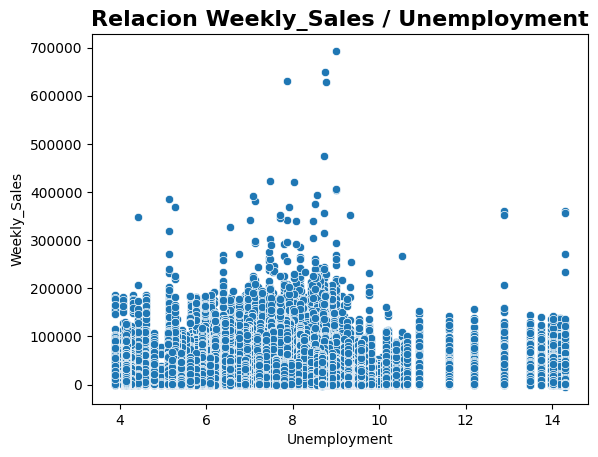

In [25]:
#Grafica de Weekly_Sales / Unemployment
sb.scatterplot( y = df_final.Weekly_Sales, x = df_final.Unemployment)
plt.title("Relacion Weekly_Sales / Unemployment", fontsize = 16, fontweight = 'bold')
plt.show()

In [32]:
#Cantidad de datos con Unemployment < 10
len(df_final.query("Unemployment < 10"))

382242

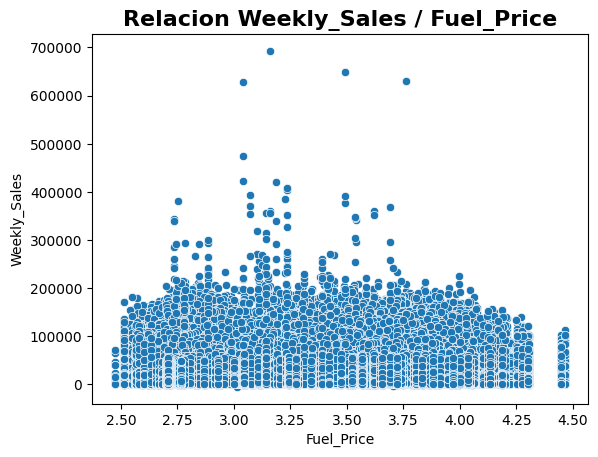

In [26]:
#Grafica de Weekly_Sales / Fuel_Price
sb.scatterplot( y = df_final.Weekly_Sales, x = df_final.Fuel_Price)
plt.title("Relacion Weekly_Sales / Fuel_Price", fontsize = 16, fontweight = 'bold')
plt.show()

In [33]:
#Cantidad de datos con Fuel_Price < 4.3
len(df_final.query("Fuel_Price < 4.3"))

420316

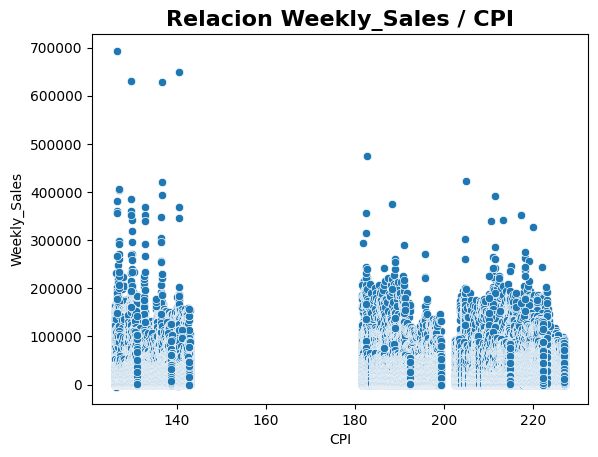

In [27]:
#Grafica de Weekly_Sales / CPI
sb.scatterplot( y = df_final.Weekly_Sales, x = df_final.CPI)
plt.title("Relacion Weekly_Sales / CPI", fontsize = 16, fontweight = 'bold')
plt.show()

In [34]:
#Datos con CPI < 150
len(df_final.query("CPI < 150"))

207891

In [35]:
#Datos con CPI < 180
len(df_final.query("CPI > 180"))

213679

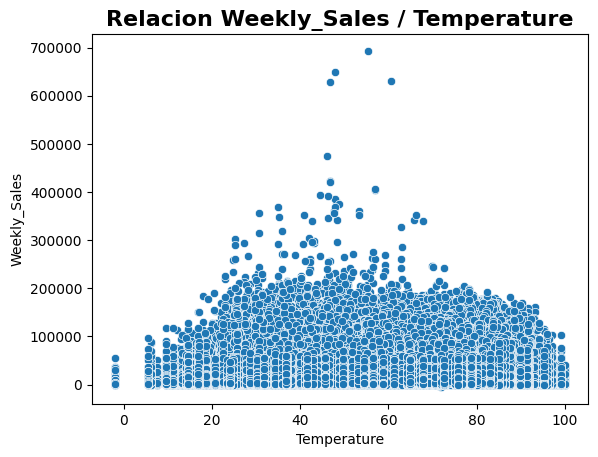

In [36]:
#Grafica de Weekly_Sales / Temperature
sb.scatterplot( y = df_final.Weekly_Sales, x = df_final.Temperature)
plt.title("Relacion Weekly_Sales / Temperature", fontsize = 16, fontweight = 'bold')
plt.show()

In [37]:
len(df_final.query("Temperature < 0"))

69

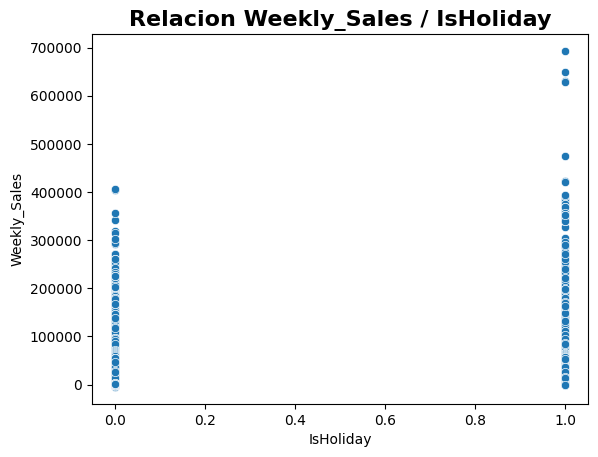

In [38]:
#Grafica de Weekly_Sales / IsHoliday
sb.scatterplot( y = df_final.Weekly_Sales, x = df_final.IsHoliday)
plt.title("Relacion Weekly_Sales / IsHoliday", fontsize = 16, fontweight = 'bold')
plt.show()

In [40]:
#Cantidad de Weekly_Sales con IsHoliday == 1
len(df_final.query ("IsHoliday == 1"))

29661

In [41]:
#Cantidad de Weekly_Sales con IsHoliday == 0
len(df_final.query("IsHoliday == 0 "))

391909

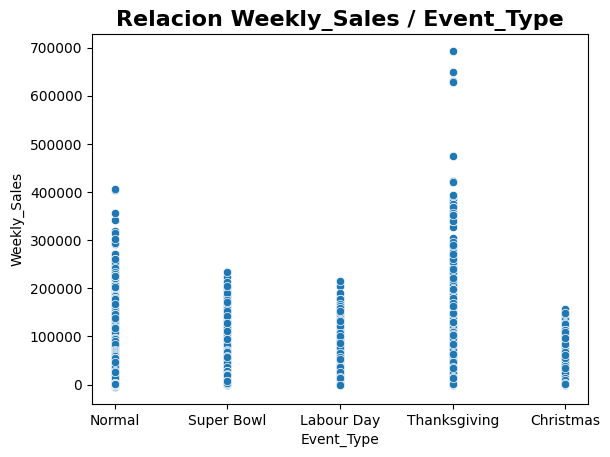

In [42]:
#Grafica de Weekly_Sales / Event_Type
sb.scatterplot( y = df_final.Weekly_Sales, x = df_final.Event_Type)
plt.title("Relacion Weekly_Sales / Event_Type", fontsize = 16, fontweight = 'bold')
plt.show()

In [45]:
#Cantidad de Weekly_Sales con Event_Type == 'Holiday'
len(df_final.query("Event_Type == 'Normal' "))

391909

In [46]:
#Cantidad de Weekly_Sales con Event_Type == 'Super Bowl'
len(df_final.query("Event_Type == 'Super Bowl'"))

8895

In [48]:
#Cantidad de Weekly_Sales con Event_Type == 'Labour Day'
len(df_final.query("Event_Type == 'Labour Day'"))

8861

In [49]:
#Cantidad de Weekly_Sales con Event_Type == 'Thanksgiving'
len(df_final.query("Event_Type == 'Thanksgiving'"))

5959

In [50]:
#Cantidad de Weekly_Sales con Event_Type == 'Christmas'
len(df_final.query("Event_Type == 'Christmas'"))

5946

# Fase 3 - Preparación de los datos

Tratamiento de valores atipicos (Outliers)

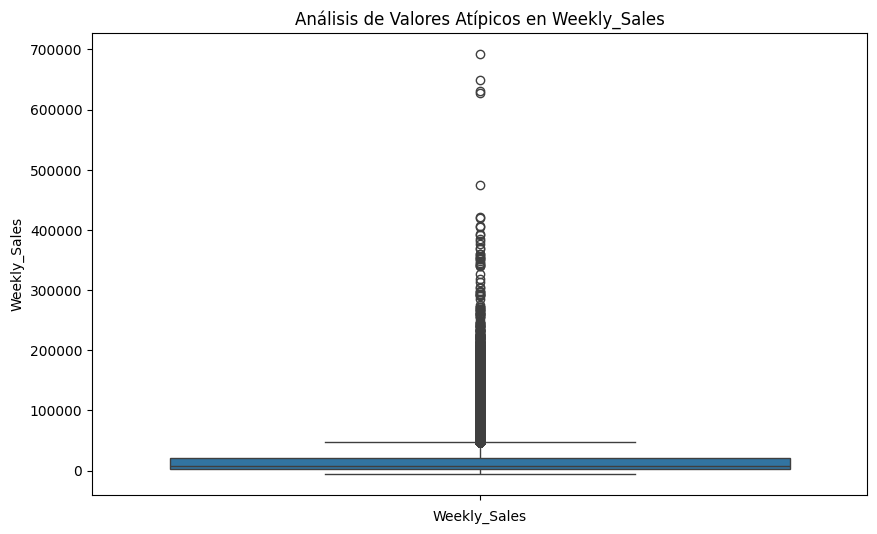

In [52]:
# Diagrama de caja para observar valores atipicos en las Weekly_Sales
plt.figure(figsize=(10, 6))
sb.boxplot(y=data['Weekly_Sales'])

# Añadir título y etiquetas
plt.title('Análisis de Valores Atípicos en Weekly_Sales')
plt.xlabel('Weekly_Sales')

# Mostrar la gráfica
plt.show()

In [53]:
#Cantidad de datos con Weekly_Sales mayores a 200000
len(df_final.query("Weekly_Sales > 200000"))

163

In [59]:
#Cantidad de datos con Weekly_Sales menores a 200000
len(df_final.query("Weekly_Sales < 200000"))

421407

In [50]:
#Cantidad de datos con Weekly_Sales menores a 0
len(df_final.query("Weekly_Sales < 0"))

1285

In [60]:
#Identificacion de los registros
df_final.query("Weekly_Sales > 200000")

,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Event_Type
6767,1,2011-11-25,1,72.0,203670.47,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,3,151315,Thanksgiving
13225,2,2010-11-19,0,92.0,205829.42,50.81,2.771,0.00,0.00,0.00,0.00,0.00,211.547030,8.163,3,202307,Normal
13248,2,2010-11-26,1,72.0,285353.53,62.98,2.735,0.00,0.00,0.00,0.00,0.00,211.406287,8.163,3,202307,Thanksgiving
13298,2,2010-11-26,1,92.0,219880.49,62.98,2.735,0.00,0.00,0.00,0.00,0.00,211.406287,8.163,3,202307,Thanksgiving
13516,2,2010-12-17,0,92.0,201863.27,47.55,2.869,0.00,0.00,0.00,0.00,0.00,211.064546,8.163,3,202307,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367602,39,2011-11-25,1,72.0,351553.98,66.36,3.236,224.08,292.94,77126.16,77.74,4875.43,217.181253,7.716,3,184109,Thanksgiving
367900,39,2011-12-23,0,7.0,225134.39,54.62,3.112,3099.34,16.14,1339.10,213.49,4911.65,218.054185,7.716,3,184109,Normal
383960,41,2010-11-26,1,72.0,290809.17,25.30,2.742,0.00,0.00,0.00,0.00,0.00,191.012180,7.508,3,196321,Thanksgiving
387592,41,2011-11-25,1,72.0,271392.45,36.37,3.424,256.95,1053.98,79621.20,40.76,2616.56,195.770400,6.759,3,196321,Thanksgiving


In [51]:
#obtener los indices donde estan ubicados los valores atipicos
df_final.query("Weekly_Sales > 200000").index

Index([  6767,  13225,  13248,  13298,  13516,  13537,  13566,  13574,  16913,
        16989,
       ...
       333606, 333874, 337045, 363988, 364261, 367602, 367900, 383960, 387592,
       414749],
      dtype='int64', length=163)

In [52]:
#Eliminar los valores atipicos
df_final.drop(df_final.query("Weekly_Sales > 200000").index, inplace = True)

In [60]:
df_final.head()

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Event_Type,Quarter
0,1,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,Normal,Trimestre1
1,1,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,Normal,Trimestre1
2,1,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,Normal,Trimestre1
3,1,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,Normal,Trimestre1
4,1,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,Normal,Trimestre1


In [54]:
# Weeekly_Sales < 0 
df_final.query("Weekly_Sales < 0")

,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Event_Type
182,1,2010-02-19,0,47.0,-863.00,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,3,151315,Normal
429,1,2010-03-12,0,47.0,-698.00,57.79,2.667,0.00,0.00,0.00,0.00,0.00,211.380643,8.106,3,151315,Normal
2555,1,2010-10-08,0,47.0,-58.00,63.93,2.633,0.00,0.00,0.00,0.00,0.00,211.746754,7.838,3,151315,Normal
3632,1,2011-01-21,0,54.0,-50.00,44.04,3.016,0.00,0.00,0.00,0.00,0.00,211.827234,7.742,3,151315,Normal
4382,1,2011-04-08,0,47.0,-298.00,67.84,3.622,0.00,0.00,0.00,0.00,0.00,215.074394,7.682,3,151315,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419972,45,2012-05-18,0,49.0,-3.97,66.30,3.848,6813.74,0.00,13.86,936.49,2941.55,190.996448,8.567,2,118221,Normal
420031,45,2012-05-25,0,49.0,-4.97,67.21,3.798,5370.39,0.00,361.22,1287.62,2461.81,191.002810,8.567,2,118221,Normal
420370,45,2012-06-29,0,49.0,-34.00,75.22,3.506,3291.36,425.60,0.00,314.88,2255.34,191.099246,8.567,2,118221,Normal
420736,45,2012-08-03,0,49.0,-1.91,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,2,118221,Normal


In [55]:
# Obtener los indices donde estan ubicados los valores atipicos de Weekly_Sales menores a 0 
df_final.query("Weekly_Sales > 200000").index

Index([], dtype='int64')

In [56]:
# Eliminar los valores atipicos de Weekly_Sales menores a 0
df_final.drop(df_final.query("Weekly_Sales < 0").index, inplace = True) 

Tratamiento de variables categoricas

In [57]:
#convertir los dates a trimestres quarters 
import pandas as pd

# Convertir la columna 'Date' a tipo datetime
df_final['Date'] = pd.to_datetime(df_final['Date'])

# Crear una nueva columna 'Quarter' basada en los meses
def asignar_trimestre(mes):
    if 1 <= mes <= 3:
        return 'Trimestre1'
    elif 4 <= mes <= 6:
        return 'Trimestre2'
    elif 7 <= mes <= 9:
        return 'Trimestre3'
    else:
        return 'Trimestre4'

df_final['Quarter'] = df_final['Date'].dt.month.apply(asignar_trimestre)

# Mostrar las primeras filas del DataFrame resultante
print(df_final.head())

   Store       Date  IsHoliday  Dept  Weekly_Sales  Temperature  Fuel_Price  \
0      1 2010-02-05          0   1.0      24924.50        42.31       2.572   
1      1 2010-02-05          0  26.0      11737.12        42.31       2.572   
2      1 2010-02-05          0  17.0      13223.76        42.31       2.572   
3      1 2010-02-05          0  45.0         37.44        42.31       2.572   
4      1 2010-02-05          0  28.0       1085.29        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        0.0        0.0        0.0        0.0        0.0  211.096358   
1        0.0        0.0        0.0        0.0        0.0  211.096358   
2        0.0        0.0        0.0        0.0        0.0  211.096358   
3        0.0        0.0        0.0        0.0        0.0  211.096358   
4        0.0        0.0        0.0        0.0        0.0  211.096358   

   Unemployment  Type    Size Event_Type     Quarter  
0         8.106     3  151315     Nor

In [58]:
df_final.describe(include = np.object_)

,Event_Type,Quarter
count,420122,420122
unique,5,4
top,Normal,Trimestre3
freq,390625,117142


In [59]:
# Eliminar la columna 'Date'
df_final.drop(['Date'], axis = 1, inplace = True)

In [41]:
#Eliminar columna Store
df_final.drop(['Store'], axis = 1, inplace = True)

In [62]:
df_final.query("Weekly_Sales < 200000")

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Event_Type,Quarter
0,1,0,1.0,24924.50,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,Normal,Trimestre1
1,1,0,26.0,11737.12,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,Normal,Trimestre1
2,1,0,17.0,13223.76,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,Normal,Trimestre1
3,1,0,45.0,37.44,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,Normal,Trimestre1
4,1,0,28.0,1085.29,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,Normal,Trimestre1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,0,13.0,26240.14,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,Normal,Trimestre4
421566,45,0,16.0,2660.02,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,Normal,Trimestre4
421567,45,0,32.0,4131.54,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,Normal,Trimestre4
421568,45,0,83.0,717.82,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,Normal,Trimestre4


In [63]:
#Respalda el data frame limpio original para poder experimentar con las tecnicas de transformacion
original_dt_final = df_final.copy()

Alternativa 0 - Uso de get_dummies de forma 'Manual'

In [65]:
#Creacion de variables Dummy 
df_final.Quarter.unique()

array(['Trimestre1', 'Trimestre2', 'Trimestre3', 'Trimestre4'],
      dtype=object)

In [70]:
#Dar un ID a cada uno de los trimestres
df_final.Quarter.replace({'Trimestre1':1, 'Trimestre2':2, 'Trimestre3':3, 'Trimestre4':4}, inplace = True)
df_final.head()

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Event_Type,Quarter
0,1,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,Normal,1
1,1,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,Normal,1
2,1,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,Normal,1
3,1,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,Normal,1
4,1,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,Normal,1


In [71]:

df_final.Event_Type.unique()

array(['Normal', 'Super Bowl', 'Labour Day', 'Thanksgiving', 'Christmas'],
      dtype=object)

In [75]:
df_final.Event_Type.replace({'Normal':0, 'Super Bowl':1, 'Labour Day':2, 'Thanksgiving':3, 'Christmas':4}, inplace = True)
df_final.head()

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Event_Type,Quarter
0,1,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,0,1
1,1,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,0,1
2,1,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,0,1
3,1,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,0,1
4,1,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,0,1


In [76]:
df_final.Event_Type.unique()

array([0, 1, 2, 3, 4])

In [77]:
#Guardar la data usando esta alternativa de transformacion
dt_final_dummies_manual = df_final.copy()

JUSTIFICACION DE ELECCION METODO 0

Con mi compañero llegamos a un acuerdo de escoger el metodo 0 de asignar las categorias de forma manual ya que encontramos que para este caso era mejor debido a su flexibildad en la personalizacion del ID 

In [ ]:
#Recuperar la version original de los datos codificados usando 'dummies manual'
df_final = dt_final_dummies_manual

In [ ]:
#Seprar variable

# Fase 4 - Modelamiento

## Variante 1 - Uso sólo de variables numéricas

In [ ]:
# Escriba su código acá

## Variante 2 - Uso de variables numéricas y categórica


In [ ]:
# Escriba su código acá

# Fase 5 - Evaluación

## Variante 1 - Uso sólo de variables numéricas

In [ ]:
# Escriba su código acá

## Variante 2 - Uso de variables numéricas y categórica

In [ ]:
# Escriba su código acá

# Fase 6 - Deployment

## Variante 1 - Uso sólo de variables numéricas

In [ ]:
# Escriba su código acá

## Variante 2 - Uso de variables numéricas y categórica

In [ ]:
# Escriba su código acá

# Pregunta final

¿Qué modelo recomendaría utilizar para cumplir con el objetivo propuesto al inicio? Deberá justificar su respuesta